In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math,copy

In [2]:
data = pd.read_csv("Downloads\\Classification_train\\Classification_train.csv")
# print(data)
# print(data.columns)
data = data.to_numpy()    #converting the dataset to numpy

In [3]:
np.random.shuffle(data)
X = data[:, range(1,785)]   #features
Y = data[: , 0]            #targets

In [4]:
X_train = X[:20000 , :]
Y_train = Y[:20000]
X_val = X[20000: , :]
Y_val = Y[20000:]

In [5]:
print(X_train[:2, :])
X_train.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(20000, 784)

In [6]:
print(Y_train)
Y_train.shape

[5 2 0 ... 0 7 7]


(20000,)

In [7]:
print(X_train[0].max())
print(X_train[0].min()) 

255
0


<h3>Feature Scaling</h3>

In [8]:
def norm(X):
    denominator_range = np.ptp(X, axis=1 , keepdims = True)
    output = X/denominator_range
    return output

In [9]:
X_train_final = norm(X_train)    #final X that is to be used for further computations
print(X_train_final)
X_val_final = norm(X_val)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(X_train_final.max())
print(X_train_final.min())

1.0
0.0


In [11]:
print(X_val_final[0].max())
print(X_val_final[0].min())

1.0
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

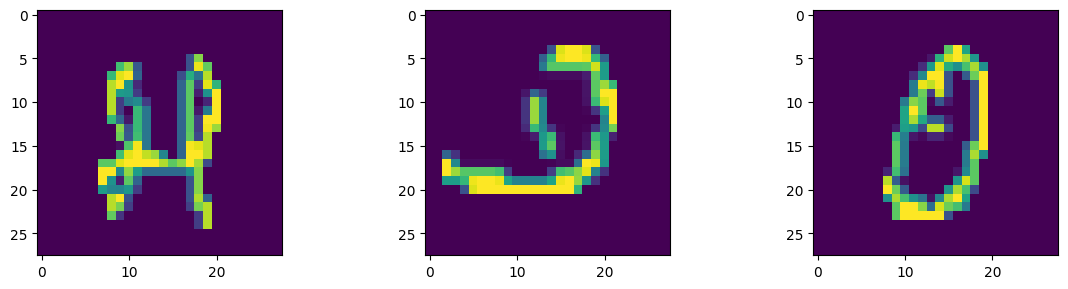

In [12]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(X_train[i].reshape(28,28))
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

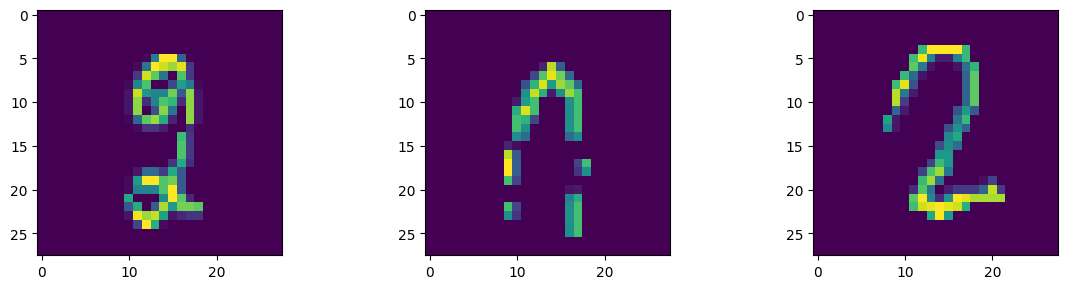

In [13]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(X_val[i].reshape(28,28))
plt.tight_layout()
plt.show

In [14]:
t = np.unique(Y_train)
print(t)

[0 1 2 3 4 5 6 7 8 9]


In [15]:
classes = t.shape[0]
print(classes)

10


<h3>Defining some necessary function</h3>

In [16]:
def init_parameters(X, hid_size):
    m,n = X.shape
    w1 = 0.01*np.random.randn(hid_size,n)
    b1 = np.random.randn(hid_size)
    w2 = 0.01*np.random.randn(classes , hid_size)
    b2 = np.random.randn(classes)
    return w1,b1,w2,b2


In [17]:
def ReLU(a):
    a_active = np.maximum(0,a)
    return a_active

In [18]:
def softmax(a):
    sub_values = a - np.max(a , axis=1 , keepdims=True)
    exp_values = np.exp(sub_values)
    norm_base =  np.sum(exp_values , axis = 1, keepdims=True)
    norm_values = exp_values/norm_base
    return norm_values

In [19]:
def forward_propagation(X, w1 , b1, w2, b2):
    z1 = X@w1.T + b1            #m,hid_size
    a1 = ReLU(z1)
    z2 = a1@w2.T + b2           # m,classes
    a2 = softmax(z2)
    return z1,a1,z2,a2

In [20]:
def back_prop(X,Y,z1 , a1 , z2, a2,w2):
    m,n = X.shape
    dz2 = a2
    dz2[range(len(X)), Y] -= 1                             # (m , classes)
    dw2 = (dz2.T @ a1)/m                                   # dw2 = (classes,hid_size)
    db2 = np.mean(dz2 , axis=0)
    da1 = z1>0
    dw1 = (((dz2@w2)*da1).T@X)/m
    db1 = np.mean((dz2@w2)*da1 , axis=0)
    return dw1,db1,dw2,db2
    

In [21]:
'''function to perform Gradient Descent algorithm'''
def Gradient_descent(X, Y , num_iters,alpha,hid_size):
    m,n = X.shape
    w1,b1,w2,b2 = init_parameters(X, hid_size)
    cost_history = []
    for i in range(num_iters):
        z1,a1,z2,a2 = forward_propagation(X, w1 , b1, w2, b2)
        a2 = np.clip(a2 , 1e-7  , 1-1e-7)
        loss = -np.log(a2[np.arange(len(a2)), Y])
        cross_entropy = np.mean(loss)
        dw1,db1,dw2,db2 = back_prop(X,Y,z1 , a1 , z2, a2,w2)
        w1 = w1 - (alpha*dw1)
        b1 = b1 - (alpha*db1)
        w2 = w2 - (alpha*dw2)
        b2 = b2 - (alpha*db2)
        cost_history.append(cross_entropy)
        if ( i% math.ceil(num_iters/100) == 0):
            print(f"Iterations : {i:5} , cost : {cost_history[-1]}")
        
    return w1, b1,w2,b2, cost_history

In [22]:
w1_final, b1_final,w2_final,b2_final, cost_history = Gradient_descent(X_train_final, Y_train , 10000 , 0.1 , 32)


Iterations :     0 , cost : 2.890574247516293
Iterations :   100 , cost : 1.5035214773333498
Iterations :   200 , cost : 0.5378603510469903
Iterations :   300 , cost : 0.31937302084710995
Iterations :   400 , cost : 0.24483041259097912
Iterations :   500 , cost : 0.20635016013900045
Iterations :   600 , cost : 0.18259860937445843
Iterations :   700 , cost : 0.16625375061118935
Iterations :   800 , cost : 0.15416099960084212
Iterations :   900 , cost : 0.14475195182925177
Iterations :  1000 , cost : 0.13710450338807567
Iterations :  1100 , cost : 0.13068707421352624
Iterations :  1200 , cost : 0.12519011355331056
Iterations :  1300 , cost : 0.12040013963372426
Iterations :  1400 , cost : 0.11615337644405103
Iterations :  1500 , cost : 0.1123300167635591
Iterations :  1600 , cost : 0.10886455463232296
Iterations :  1700 , cost : 0.10569749924078344
Iterations :  1800 , cost : 0.10277482476121919
Iterations :  1900 , cost : 0.10007601487676866
Iterations :  2000 , cost : 0.097574562011716

<h3>COST VS NUMBER  OF ITERATIONS PLOT</h3>

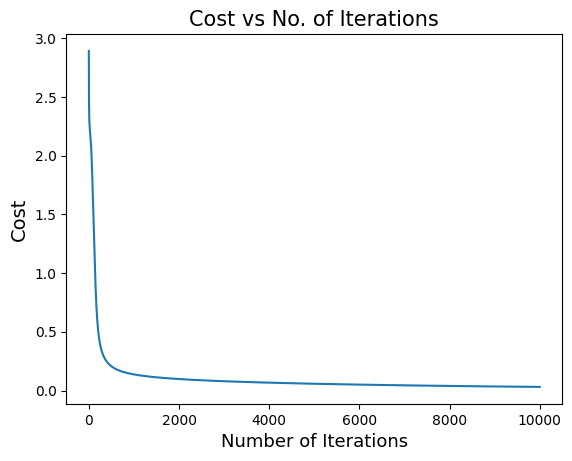

In [23]:
plt.plot(np.arange(len(cost_history)), cost_history)
plt.xlabel('Number of Iterations', size=13)
plt.ylabel('Cost', size=14)
plt.title('Cost vs No. of Iterations', size = 15)
plt.show()

In [24]:
z1,a1,z2,a2 = forward_propagation(X_train_final, w1_final , b1_final, w2_final, b2_final)

In [25]:
y_predict = np.clip(a2 , 1e-7  , 1-1e-7)
print(y_predict)
predictions = np.argmax(y_predict,axis=1)
print(predictions)

[[1.00000000e-07 3.48324305e-07 1.00000000e-07 ... 1.00000000e-07
  1.00000000e-07 1.00000000e-07]
 [1.00000000e-07 1.00000000e-07 9.99999900e-01 ... 1.00000000e-07
  1.00000000e-07 1.00000000e-07]
 [9.90092471e-01 9.44525110e-05 9.79462252e-03 ... 1.00000000e-07
  1.72218274e-07 5.53696129e-07]
 ...
 [9.99657144e-01 2.75076695e-05 1.47570224e-04 ... 1.04755130e-05
  2.71246377e-06 1.00000000e-07]
 [2.52738553e-04 1.37174691e-03 3.03353641e-04 ... 9.64388258e-01
  9.73393787e-04 5.14114587e-05]
 [1.59412992e-05 1.00000000e-07 1.60586268e-04 ... 9.78874194e-01
  3.58138069e-07 1.57589178e-02]]
[5 2 0 ... 0 7 7]


In [26]:
loss = -np.log(y_predict[np.arange(len(y_predict)), Y_train])
cross_entropy = np.mean(loss)
print(loss)
print(cross_entropy)

[3.53286191e-07 1.00000005e-07 9.95693503e-03 ... 3.42914984e-04
 3.62613077e-02 2.13521497e-02]
0.030588023113586247


In [27]:
accuracy = np.mean(predictions == Y_train)*100
print("accuracy:", accuracy)

accuracy: 99.42


In [28]:
z1_val,a1_val,z2_val,a2_val = forward_propagation(X_val_final, w1_final , b1_final, w2_final, b2_final)

In [29]:
y_predict_val = np.clip(a2_val , 1e-7  , 1-1e-7)
print(y_predict_val)
predictions_val = np.argmax(y_predict_val,axis=1)
print(predictions_val)

[[1.24196297e-02 2.05233117e-07 1.24661913e-03 ... 5.16815244e-01
  3.40590046e-06 4.31887986e-03]
 [2.28516149e-03 9.97409188e-01 3.97122906e-05 ... 1.33912356e-05
  1.06209389e-04 1.37745052e-04]
 [8.72559036e-07 1.00000000e-07 1.74530478e-07 ... 9.99504783e-01
  1.00000000e-07 1.03862514e-04]
 ...
 [4.01439814e-07 1.00000000e-07 1.00000000e-07 ... 9.65434863e-01
  1.00000000e-07 1.00000000e-07]
 [1.76295666e-06 1.00000000e-07 1.00000000e-07 ... 1.00429308e-03
  1.00000000e-07 1.55382265e-06]
 [1.00000000e-07 1.59157546e-05 4.88819794e-06 ... 1.00000000e-07
  1.74653899e-07 1.00000000e-07]]
[7 1 7 ... 7 6 5]


In [30]:
loss_val = -np.log(y_predict_val[np.arange(len(y_predict_val)), Y_val])
cross_entropy_val = np.mean(loss_val)
print(loss_val)
print(cross_entropy_val)

[7.92163239e-01 2.59417399e-03 4.95339557e-04 ... 3.51766439e-02
 1.00870208e-03 2.37889714e-05]
0.09728292954016939


In [31]:
accuracy_val = np.mean(predictions_val == Y_val)*100
print("accuracy:", accuracy_val)

accuracy: 97.38


<h3>Testing the model on the Test dataset</h3>

In [32]:
test_data = pd.read_csv("Downloads\\Classification_test\\Classification_test.csv")
# print(test_data.columns)
test_data = test_data.to_numpy()

In [33]:
X_test = np.delete(test_data , 0 , axis =1)
ID = test_data[:,0]

In [34]:
X_test.shape

(10000, 784)

In [35]:
X_test_final = norm(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

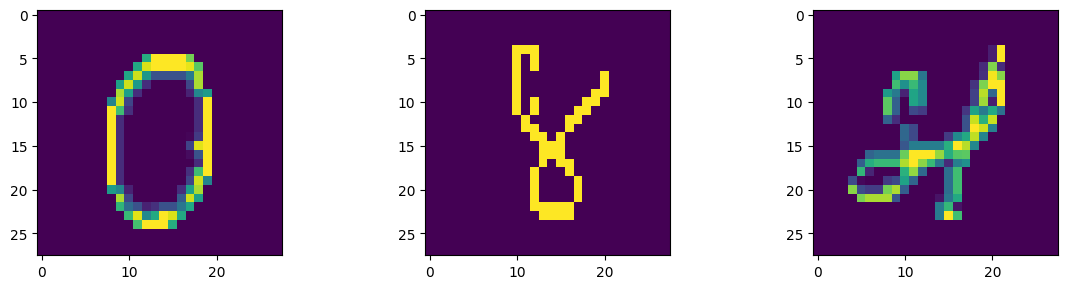

In [36]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(X_test[i].reshape(28,28))
plt.tight_layout()
plt.show

In [37]:
z1_test,a1_test,z2_test,a2_test = forward_propagation(X_test_final, w1_final , b1_final, w2_final, b2_final)
y_predict_test = np.clip(a2_test , 1e-7  , 1-1e-7)
predictions_test = np.argmax(y_predict_test,axis=1)
print(predictions_test)

[0 4 5 ... 0 8 2]


In [38]:
test_data_predictions = np.c_[ID,predictions_test]
df = pd.DataFrame(test_data_predictions , columns = ['IDs','Predicted-Labels'])
df.to_csv("Downloads\\CL-Project\\Neural_Network_Predictions.csv", index=False)